<a href="https://colab.research.google.com/github/yohanesnuwara/reservoir-qi/blob/master/BigData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Handling Big Volume of Well Data

In [0]:
import numpy as np

Access Google Drive to get data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks')

Read multiple files. In the folder, there are 46 LAS files from Norne Field.

In [4]:
import glob
import os

file_path = "/content/drive/My Drive/Colab Notebooks/well_logs"
read_files = glob.glob(os.path.join(file_path, "*.las"))
read_files

['/content/drive/My Drive/Colab Notebooks/well_logs/660810-B-1BH.las',
 '/content/drive/My Drive/Colab Notebooks/well_logs/660810-E-2AH.las',
 '/content/drive/My Drive/Colab Notebooks/well_logs/660810-B-1AHT2.las',
 '/content/drive/My Drive/Colab Notebooks/well_logs/660810-K-1HT2.las',
 '/content/drive/My Drive/Colab Notebooks/well_logs/660810-B-1H.las',
 '/content/drive/My Drive/Colab Notebooks/well_logs/660810-B-2H.las',
 '/content/drive/My Drive/Colab Notebooks/well_logs/660810-B-3H.las',
 '/content/drive/My Drive/Colab Notebooks/well_logs/660810-B-4AH.las',
 '/content/drive/My Drive/Colab Notebooks/well_logs/660810-B-4BH.las',
 '/content/drive/My Drive/Colab Notebooks/well_logs/660810-B-4CH.las',
 '/content/drive/My Drive/Colab Notebooks/well_logs/660810-B-4DHT2.las',
 '/content/drive/My Drive/Colab Notebooks/well_logs/660810-B-4H.las',
 '/content/drive/My Drive/Colab Notebooks/well_logs/660810-C-1H.las',
 '/content/drive/My Drive/Colab Notebooks/well_logs/660810-C-2H.las',
 '/cont

Get the name of the well from the file.

In [0]:
well_names = []

for files in read_files:
  files = os.path.splitext(os.path.basename(files))[0]
  well_names.append(files)

In [32]:
well_names

['660810-B-1BH',
 '660810-E-2AH',
 '660810-B-1AHT2',
 '660810-K-1HT2',
 '660810-B-1H',
 '660810-B-2H',
 '660810-B-3H',
 '660810-B-4AH',
 '660810-B-4BH',
 '660810-B-4CH',
 '660810-B-4DHT2',
 '660810-B-4H',
 '660810-C-1H',
 '660810-C-2H',
 '660810-C-3H',
 '660810-C-4AH',
 '660810-C-4H',
 '660810-D-1AH',
 '660810-D-1BH',
 '660810-D-1CH',
 '660810-D-1H',
 '660810-D-2HT2',
 '660810-D-3AH',
 '660810-D-3BY1HT2',
 '660810-D-3BY2H',
 '660810-D-3H',
 '660810-D-4AH',
 '660810-D-4AHT2',
 '660810-D-4H',
 '660810-E-1H',
 '660810-E-2H',
 '660810-E-3AH',
 '660810-E-3AHT2',
 '660810-E-3BH',
 '660810-E-3CHT2',
 '660810-E-3H',
 '660810-E-4AH',
 '660810-E-4AHT2',
 '660810-E-4H',
 '660810-E-4HT2',
 '660810-F-1H',
 '660810-F-2H',
 '660810-F-3H',
 '660810-F-4H',
 '660810-K-1H',
 '660810-K-3H']

If the well name too long, shorten it by renaming it.

In [0]:
well_names = np.array(well_names)
wellnames = np.array(['B1BH', 'E2AH', 'B1AHT2', 'K1HT2',
                      'B1H', 'B2H', 'B3H', 'B4AH',
                      'B4BH', 'B4CH', 'B4DHT2', 'B4H',
                      'C1H', 'C2H', 'C3H', 'C4AH',
                      'C4H', 'D1AH', 'D1BH', 'D1CH',
                      'D1H', 'D2HT2', 'D3AH', 'D3BY1HT2',
                      'D3BY2H', 'D3H', 'D4AH', 'D4AHT2',
                      'D4H', 'E1H', 'E2H', 'E3AH',
                      'E3AHT2', 'E3BH', 'E3CHT2','E3H',
                      'E4AH', 'E4AHT2', 'E4H','E4HT2',
                      'F1H', 'F2H', 'F3H', 
                      'F4H','K1H', 'K3H'])

Import `lasio` library to import LAS data

In [51]:
!pip install lasio

In [0]:
import lasio

Read LAS file (if command: `Header section Parameter regexp=~P was not found.`, it's OK)

In [78]:
lases = []

for files in read_files:
    las = lasio.read(files)
    lases.append(las)

Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.


Input the name of the well you want to view in the `find` and check what data is present.

In [83]:
find = 'B2H'
id_ = np.int64(np.where(wellnames==find)).item()
lases[id_].keys()

['DEPTH',
 'TVD',
 'TVDSS',
 'DT',
 'GR',
 'KLOGH',
 'NPHI',
 'PHIF',
 'RHOB',
 'SW',
 'VSH']

Check more details.

In [84]:
lases[id_].curves

[CurveItem(mnemonic=DEPTH, unit=M, value=, descr=Measured Depth, original_mnemonic=DEPTH, data.shape=(27291,)),
 CurveItem(mnemonic=TVD, unit=M, value=, descr=True Vertical Depth (TVD), original_mnemonic=TVD, data.shape=(27291,)),
 CurveItem(mnemonic=TVDSS, unit=M, value=, descr=True Vertical Depth (TVDSS), original_mnemonic=TVDSS, data.shape=(27291,)),
 CurveItem(mnemonic=DT, unit=us/ft, value=, descr=DT:UNKNOWN:rC:NONE:v1, original_mnemonic=DT, data.shape=(27291,)),
 CurveItem(mnemonic=GR, unit=API, value=, descr=GR:UNKNOWN:rC:NONE:v1, original_mnemonic=GR, data.shape=(27291,)),
 CurveItem(mnemonic=KLOGH, unit=mD, value=, descr=KLOGH:UNKNOWN:rC:NONE:v1, original_mnemonic=KLOGH, data.shape=(27291,)),
 CurveItem(mnemonic=NPHI, unit=v/v_decimal, value=, descr=NPHI:UNKNOWN:rC:NONE:v1, original_mnemonic=NPHI, data.shape=(27291,)),
 CurveItem(mnemonic=PHIF, unit=v/v_decimal, value=, descr=PHIF:UNKNOWN:rC:NONE:v1, original_mnemonic=PHIF, data.shape=(27291,)),
 CurveItem(mnemonic=RHOB, unit=

# ***

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

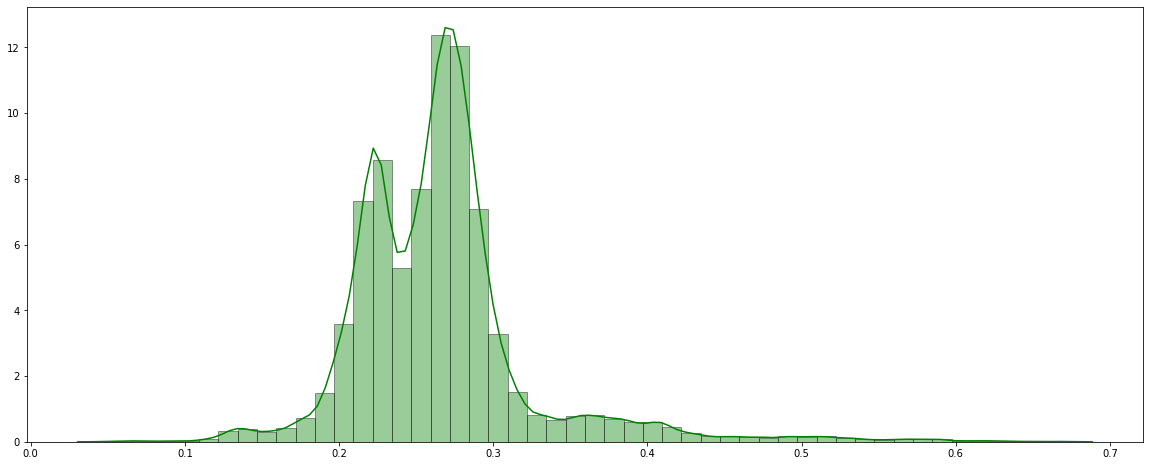

In [0]:
append = np.append(lases[1].data['NPHI'], lases[2].data['NPHI'])
append2 = np.append(append, lases[3].data['NPHI'])
append3 = np.append(append2, lases[5].data['NPHI'])
append4 = np.append(append3, lases[6].data['NPHI'])
append4 = append4[np.logical_not(np.isnan(append4))] # delete NaN values, otherwise sns distplot can't plot
plt.figure(figsize=(20,8))
sns.distplot(append4, bins=50, color='green', hist_kws=dict(edgecolor="black", linewidth=1))
plt.show()

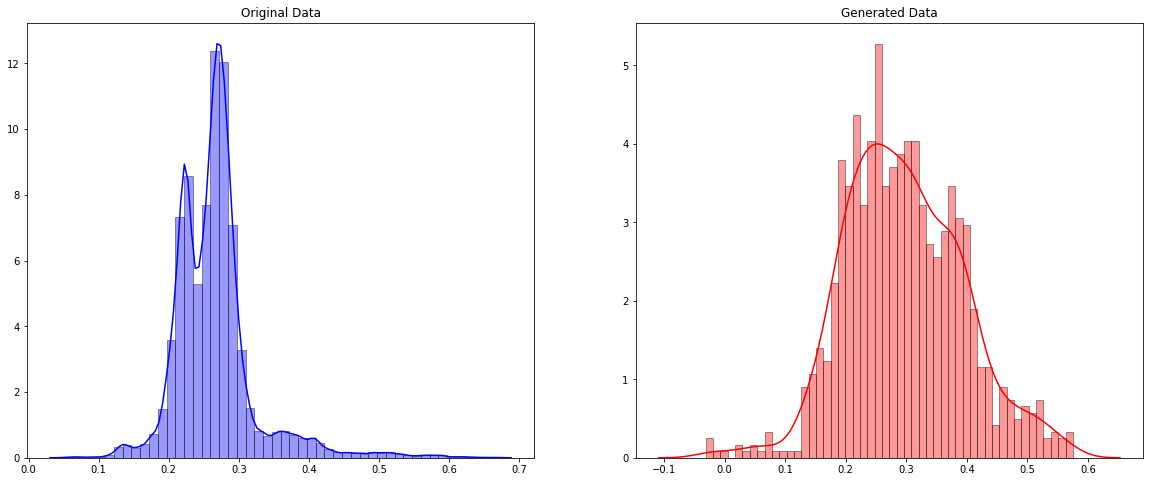

In [0]:
import numpy as np
import matplotlib.pyplot as plt

#import data
#conists of one column of datapoints as 2.231, -0.1516, 1.564, etc
# data=np.loadtxt("https://github.com/HomeworkHelpOnline/KDE-Task/raw/master/dataset1.txt")
data=append4

#normalized histogram of loaded datase
hist, bins = np.histogram(data,bins=100,range=(np.min(data),np.max(data)) ,density=True)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2


#generate data with double random()
generatedData=np.zeros(1000)
maxData=np.max(data)
minData=np.min(data)
i=0
while i<1000:
    randNo=np.random.rand(1)*(maxData-minData)-np.absolute(minData)
    if np.random.rand(1)<=hist[np.argmax(randNo<(center+(bins[1] - bins[0])/2))-1]:
        generatedData[i]=randNo
        i+=1

#normalized histogram of generatedData
hist1, bins2 = np.histogram(generatedData,bins=100,range=(np.min(data),np.max(data)), density=True)
width2 = 0.7 * (bins2[1] - bins2[0])
center2 = (bins2[:-1] + bins2[1:]) / 2

#plot both histograms
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title("Original Data")
sns.distplot(data, bins=50, color ='blue', hist_kws=dict(edgecolor="black", linewidth=1))
plt.subplot(1,2,2)
plt.title("Generated Data")
sns.distplot(generatedData, bins=50, color ='red', hist_kws=dict(edgecolor="black", linewidth=1))

Text(0.5, 1.0, 'Generated, LSCV bandwidth h=0.01')

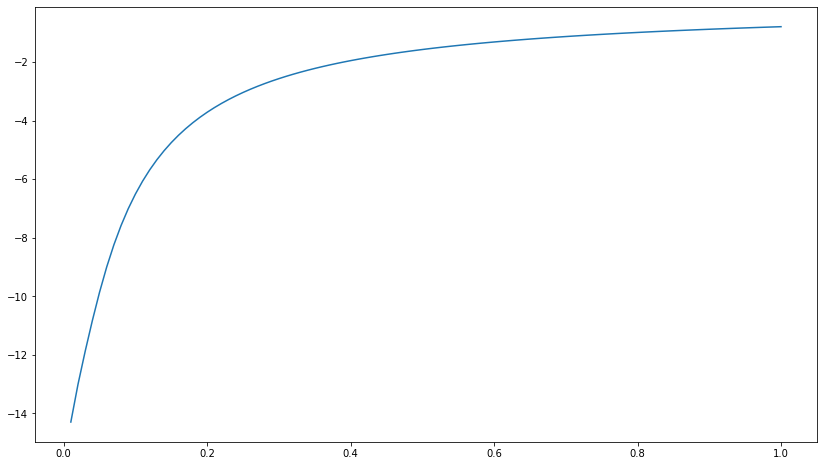

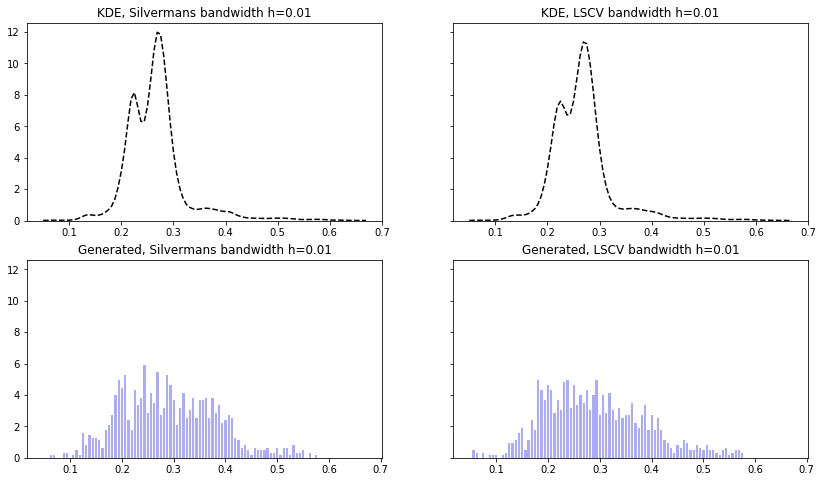

In [0]:
import numpy as np
import matplotlib.pyplot as plt

#https://en.wikipedia.org/wiki/Gaussian_function
def gaussian(x,b=1):
    return np.exp(-x**2/(2*b**2))/(b*np.sqrt(2*np.pi))
    
#import data
#conists of one column of datapoints as 2.231, -0.1516, 1.564, etc
# data=np.loadtxt("https://github.com/HomeworkHelpOnline/KDE-Task/raw/master/dataset1.txt")
data=append4

N=100 #Number of bins
lenDataset = len(data)
#normalized histogram of loaded datase
hist, bins = np.histogram(data, bins=N, range=(np.min(data), np.max(data)), density=True)
width = 0.7 * (bins[1] - bins[0])
dx=(bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2

##Generate data
#There are few options here - save values of KDE for every small dx 
#OR save all the dataset and generate probability for every x we will test.
#We choose the second option here.

sumPdfSilverman=np.zeros(len(center))
#Silverman's Rule to find optimal bandwidth
#https://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth
h=1.06*np.std(data)*lenDataset**(-1/5.0)

for i in range(0, lenDataset):
    sumPdfSilverman+=((gaussian(center[:, None]-data[i],h))/lenDataset)[:,0]
    
#So here we have to sum 1000 gaussians at generated random x to evaluate probability that this x exists in new generated dataset.
i=0
generatedDataPdfSilverman=np.zeros(1000)
while i<1000:
    randNo=np.random.rand(1)*(np.max(data)-np.min(data))-np.absolute(np.min(data))
    if np.random.rand(1)<=np.sum((gaussian(randNo-data,h))/lenDataset):
        generatedDataPdfSilverman[i]=randNo
        i+=1

#Our second approach to calculate optimal bandwidth h using least-squares cross validation
#This looks a bit tricky, take a look at the theory explanation in the related article if you need to.
h_test = np.linspace(0.01, 1, 100) #h values to iterate for testing
L = np.zeros(len(h_test))
fhati = np.zeros(len(data)) #fhati
center
iteration=0
for h_iter in h_test:
    #find first part of equation
    for i in range(0, lenDataset):
        fhat = 0
        fhat+=((gaussian(center[:, None]-data[i],h_iter))/lenDataset)[:,0]
    
    #find second part of equation for sum fhati
    for i in range (0, lenDataset):
        mask=np.ones(lenDataset,dtype=bool)
        mask[i]=0
        fhati[i]=np.sum(gaussian(data[mask]-data[i],h_iter))/(lenDataset-1)
    
    L[iteration]=np.sum(fhat**2)*dx-2*np.mean(fhati)
    iteration=iteration+1

h2=h_test[np.argmin(L)]
#we can look how L looks like, depending on h
fig0, ax0 = plt.subplots(1,1, figsize=(14,8))
ax0.plot(h_test,L)
fig0.savefig("Function_to_minimize[h,L_value].jpg")

#resulting PDF with found h2
sumPdfLSCV=np.zeros(len(center))
for i in range(0, lenDataset):
    sumPdfLSCV+=((gaussian(center[:, None]-data[i],h2))/lenDataset)[:,0]

#So here we have to sum 1000 gaussians at generated random x to evaluate probability that this x exists in new generated dataset.
i=0
generatedDataPdfCV=np.zeros(1000)
while i<1000:
    randNo=np.random.rand(1)*(np.max(data)-np.min(data))-np.absolute(np.min(data))
    if np.random.rand(1)<=np.sum((gaussian(randNo-data,h2))/lenDataset):
        generatedDataPdfCV[i]=randNo
        i+=1


##Plotting
fig, ax = plt.subplots(2,2, figsize=(14,8), sharey=True )
#Estimated PDF using Silverman's calculation for h
ax[0,0].plot(center, sumPdfSilverman, '-k', linestyle="dashed")
ax[0,0].set_title('KDE, Silvermans bandwidth h=%.2f' % h)

#Histogram for generated data using KDE and h found using Silverman's method
hist2, bins2 = np.histogram(generatedDataPdfSilverman, bins=N, range=(np.min(data), np.max(data)), density=True)
ax[1,0].bar(center, hist2, align='center', width=width, fc='#AAAAFF')
ax[1,0].set_title('Generated, Silvermans bandwidth h=%.2f' % h)

#Estimated PDF using Least-squares cross-validation for h
ax[0,1].plot(center, sumPdfLSCV, '-k', linestyle="dashed")
ax[0,1].set_title('KDE, LSCV bandwidth h=%.2f' % h2)

#Histogram for generated data using KDE and h found using LSCV
hist3, bins3 = np.histogram(generatedDataPdfCV, bins=N, range=(np.min(data), np.max(data)), density=True)
ax[1,1].bar(center, hist3, align='center', width=width, fc='#AAAAFF')
ax[1,1].set_title('Generated, LSCV bandwidth h=%.2f' % h2)

#note that PDF found using KDE does not sum up exactly to one, because we ignore the side-spread

Text(0.5, 1.0, 'Generated, LSCV bandwidth h=0.01')

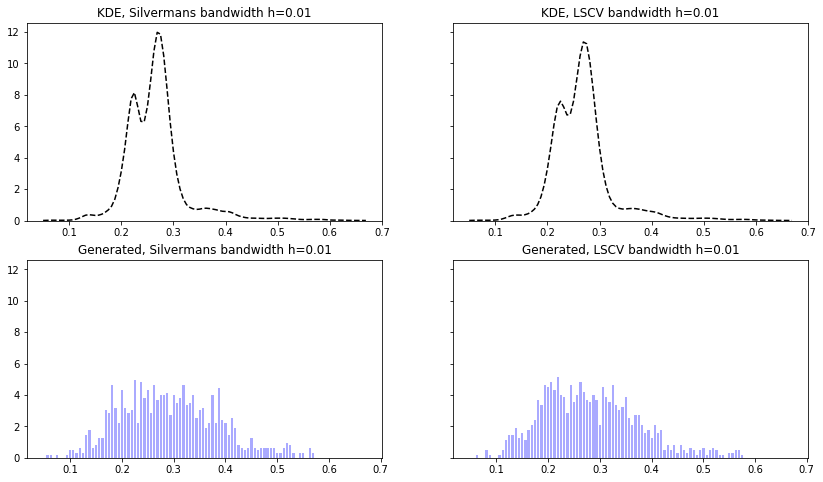

In [0]:
import numpy as np
import matplotlib.pyplot as plt

#https://en.wikipedia.org/wiki/Gaussian_function
def gaussian(x,b=1):
    return np.exp(-x**2/(2*b**2))/(b*np.sqrt(2*np.pi))
    
#import data
#conists of one column of datapoints as 2.231, -0.1516, 1.564, etc
# data=np.loadtxt("https://github.com/HomeworkHelpOnline/KDE-Task/raw/master/dataset1.txt")
data=append4

N=100 #Number of bins
lenDataset = len(data)
#normalized histogram of loaded datase
hist, bins = np.histogram(data, bins=N, range=(np.min(data), np.max(data)), density=True)
width = 0.7 * (bins[1] - bins[0])
dx=(bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2

##Generate data
#There are few options here - save values of KDE for every small dx 
#OR save all the dataset and generate probability for every x we will test.
#We choose the second option here.

sumPdfSilverman=np.zeros(len(center))
#Silverman's Rule to find optimal bandwidth
#https://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth
h=1.06*np.std(data)*lenDataset**(-1/5.0)

for i in range(0, lenDataset):
    sumPdfSilverman+=((gaussian(center[:, None]-data[i],h))/lenDataset)[:,0]
    
#So here we have to sum 1000 gaussians at generated random x to evaluate probability that this x exists in new generated dataset.
i=0
generatedDataPdfSilverman=np.zeros(1000)
while i<1000:
    randNo=np.random.rand(1)*(np.max(data)-np.min(data))-np.absolute(np.min(data))
    if np.random.rand(1)<=np.sum((gaussian(randNo-data,h))/lenDataset):
        generatedDataPdfSilverman[i]=randNo
        i+=1

# #Our second approach to calculate optimal bandwidth h using least-squares cross validation
# #This looks a bit tricky, take a look at the theory explanation in the related article if you need to.
# h_test = np.linspace(0.01, 1, 100) #h values to iterate for testing
# L = np.zeros(len(h_test))
# fhati = np.zeros(len(data)) #fhati
# center
# iteration=0
# for h_iter in h_test:
#     #find first part of equation
#     for i in range(0, lenDataset):
#         fhat = 0
#         fhat+=((gaussian(center[:, None]-data[i],h_iter))/lenDataset)[:,0]
    
#     #find second part of equation for sum fhati
#     for i in range (0, lenDataset):
#         mask=np.ones(lenDataset,dtype=bool)
#         mask[i]=0
#         fhati[i]=np.sum(gaussian(data[mask]-data[i],h_iter))/(lenDataset-1)
    
#     L[iteration]=np.sum(fhat**2)*dx-2*np.mean(fhati)
#     iteration=iteration+1

# h2=h_test[np.argmin(L)]
# #we can look how L looks like, depending on h
# fig0, ax0 = plt.subplots(1,1, figsize=(14,8))
# ax0.plot(h_test,L)
# fig0.savefig("Function_to_minimize[h,L_value].jpg")

h2 = 0.01

#resulting PDF with found h2
sumPdfLSCV=np.zeros(len(center))
for i in range(0, lenDataset):
    sumPdfLSCV+=((gaussian(center[:, None]-data[i],h2))/lenDataset)[:,0]

#So here we have to sum 1000 gaussians at generated random x to evaluate probability that this x exists in new generated dataset.
i=0
generatedDataPdfCV=np.zeros(1000)
while i<1000:
    randNo=np.random.rand(1)*(np.max(data)-np.min(data))-np.absolute(np.min(data))
    if np.random.rand(1)<=np.sum((gaussian(randNo-data,h2))/lenDataset):
        generatedDataPdfCV[i]=randNo
        i+=1


##Plotting
fig, ax = plt.subplots(2,2, figsize=(14,8), sharey=True )
#Estimated PDF using Silverman's calculation for h
ax[0,0].plot(center, sumPdfSilverman, '-k', linestyle="dashed")
ax[0,0].set_title('KDE, Silvermans bandwidth h=%.2f' % h)

#Histogram for generated data using KDE and h found using Silverman's method
hist2, bins2 = np.histogram(generatedDataPdfSilverman, bins=N, range=(np.min(data), np.max(data)), density=True)
ax[1,0].bar(center, hist2, align='center', width=width, fc='#AAAAFF')
ax[1,0].set_title('Generated, Silvermans bandwidth h=%.2f' % h)

#Estimated PDF using Least-squares cross-validation for h
ax[0,1].plot(center, sumPdfLSCV, '-k', linestyle="dashed")
ax[0,1].set_title('KDE, LSCV bandwidth h=%.2f' % h2)

#Histogram for generated data using KDE and h found using LSCV
hist3, bins3 = np.histogram(generatedDataPdfCV, bins=N, range=(np.min(data), np.max(data)), density=True)
ax[1,1].bar(center, hist3, align='center', width=width, fc='#AAAAFF')
ax[1,1].set_title('Generated, LSCV bandwidth h=%.2f' % h2)

#note that PDF found using KDE does not sum up exactly to one, because we ignore the side-spread

In [0]:
h

0.007713390076502416

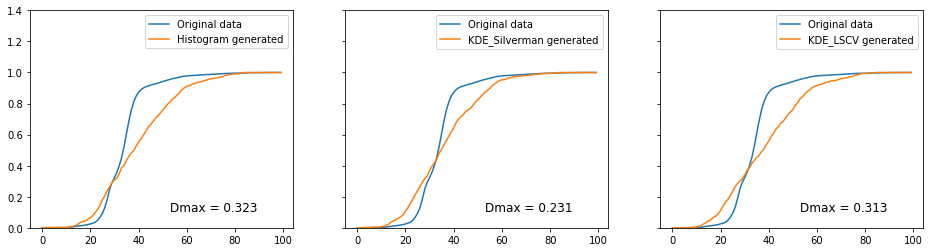

In [0]:
cumulative = np.cumsum(hist)*dx               #original dataset
cumulativeHist = np.cumsum(hist1)*dx          #histogram generated
cumulativeKDE_Silverman = np.cumsum(hist2)*dx #KDE Silverman's h generated
cumulativeKDE_LSCV = np.cumsum(hist3)*dx      #KDE LSCV generated

DHist=np.max(np.absolute(cumulative-cumulativeHist))
DKDE_Silverman=np.max(np.absolute(cumulative-cumulativeKDE_Silverman))
DKDE_LSCV=np.max(np.absolute(cumulative-cumulativeKDE_LSCV))

fig, ax = plt.subplots(1,3, figsize=(16,4), sharey=True)
ax[0].set_ylim([0,1.4])
ax[0].plot(cumulative, label="Original data")
ax[0].plot(cumulativeHist, label="Histogram generated")
ax[0].legend()
ax[0].set_title('Dmax = %.3f' % DHist, y=0.05, x=0.7)

ax[1].plot(cumulative, label="Original data")
ax[1].plot(cumulativeKDE_Silverman, label="KDE_Silverman generated")
ax[1].legend()
ax[1].set_title('Dmax = %.3f' % DKDE_Silverman, y=0.05, x=0.7)

ax[2].plot(cumulative, label="Original data")
ax[2].plot(cumulativeKDE_LSCV, label="KDE_LSCV generated")
ax[2].legend()
ax[2].set_title('Dmax = %.3f' % DKDE_LSCV, y=0.05, x=0.7)
plt.show()

Gaussian, Epanechnikov, Tophat KDE

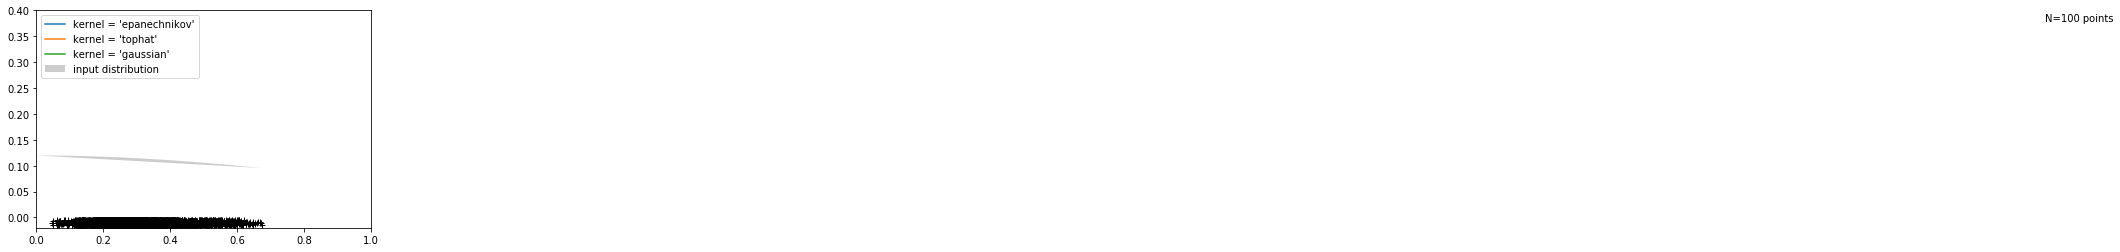

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.neighbors import KernelDensity

# Plot a 1D density example

# N = 100
# np.random.seed(1)
# X = np.concatenate((np.random.normal(0, 1, int(0.3 * N)),
#                     np.random.normal(5, 1, int(0.7 * N))))[:, np.newaxis]

X = np.c_[append4]

X_plot = np.linspace(0, max(append4), 1000)[:, np.newaxis]

true_dens = (0.3 * norm(0, 1).pdf(X_plot[:, 0]) + 0.7 * norm(5, 1).pdf(X_plot[:, 0]))

fig, ax = plt.subplots()
ax.fill(X_plot[:, 0], true_dens, fc='black', alpha=0.2, label='input distribution')

for kernel in ['epanechnikov', 'tophat', 'gaussian']:
    kde = KernelDensity(kernel=kernel, bandwidth=0.5).fit(X)
    log_dens = kde.score_samples(X_plot)
    ax.plot(X_plot[:, 0], np.exp(log_dens), '-',
            label="kernel = '{0}'".format(kernel))

ax.text(6, 0.38, "N={0} points".format(N))

ax.legend(loc='upper left')
ax.plot(X[:, 0], -0.005 - 0.01 * np.random.random(X.shape[0]), '+k')

ax.set_xlim(0, 1)
ax.set_ylim(-0.02, 0.4)
plt.show()